<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications/blob/main/CSD458_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS485: Data Science and Applications
## Assignment 5 : Classify Fashion MNist images using CNNs
### Vasileios Papageridis - csd4710

---



### **PART A: Training Convolutional Neural Networks (CNNs)**


In [30]:
import torch
from torch import nn
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.v2 as v2
import torchvision.models as models
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter
import torch.optim as optim
import os


#### 1. Download the Fashion Mnist Dataset



#### 2. Define the Dataset, Dataloader, Transforms. Use v2.Compose() to include even more transforms, such as rotations, crops and others.



In [2]:
# Training transformations with augmentation
train_transform = v2.Compose([
    v2.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),    # Random rotation, translation, and scale
    v2.RandomCrop(28, padding=4),                                           # Random crop with padding
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((0.5,), (0.5,)),
])

# Test transformations without augmentation
test_transform = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=test_transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
num_classes = len(classes)
print('Number of classes:', num_classes)

Number of classes: 10


#### 3. Make your own version of CNN and report the validatation set accuracy



In [65]:
class CustomCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(64 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [66]:
model = CustomCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [67]:
from tqdm import tqdm

num_epochs = 5

for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 40 == 39:    # Every 1000 mini-batches...
            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}')
            # Check against the validation set
            running_vloss = 0.0

            # In evaluation mode some model specific operations can be omitted
            model.train(False) # Switching to evaluation mode
            for j, vdata in enumerate(testloader, 0):
                vinputs, vlabels = vdata
                voutputs = model(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()

            model.train(True) # Switching back to training mode
            avg_loss = running_loss / 40
            avg_vloss = running_vloss / len(testloader)
            print("Avg losses", avg_loss, avg_vloss)
            running_loss = 0.0


print('Finished Training')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1, Mini-batch 40
Avg losses 1.966175478696823 1.2550132517602033
Epoch 1, Mini-batch 80
Avg losses 1.4010122001171113 0.9918670551792071
Epoch 1, Mini-batch 120
Avg losses 1.165960742533207 0.8882363525925169
Epoch 1, Mini-batch 160
Avg losses 1.0235280334949493 0.852897998633658
Epoch 1, Mini-batch 200
Avg losses 0.9223049134016037 0.7549993253437577
Epoch 1, Mini-batch 240
Avg losses 0.8800206527113914 0.754809378059047
Epoch 1, Mini-batch 280
Avg losses 0.8522170141339303 0.7596914403757472
Epoch 1, Mini-batch 320
Avg losses 0.8507828488945961 0.7086971404066511
Epoch 1, Mini-batch 360
Avg losses 0.7998210445046425 0.7029060341749981
Epoch 1, Mini-batch 400
Avg losses 0.7617340311408043 0.677240739962098
Epoch 1, Mini-batch 440
Avg losses 0.7845756053924561 0.6791489978504789
Epoch 1, Mini-batch 480
Avg losses 0.7197679497301579 0.654558840640791
Epoch 1, Mini-batch 520
Avg losses 0.7394823916256428 0.6267067567937693
Epoch 1, Mini-batch 560
Avg losses 0.7299331486225128 0.639

 20%|██        | 1/5 [01:58<07:54, 118.53s/it]

Epoch 2, Mini-batch 40
Avg losses 0.6338512025773525 0.5645566053071599
Epoch 2, Mini-batch 80
Avg losses 0.6475940138101578 0.5438023203877127
Epoch 2, Mini-batch 120
Avg losses 0.6018777124583721 0.5595501365175672
Epoch 2, Mini-batch 160
Avg losses 0.6359315931797027 0.5640308541856753
Epoch 2, Mini-batch 200
Avg losses 0.6499474242329597 0.5428824954351802
Epoch 2, Mini-batch 240
Avg losses 0.6209296651184559 0.5767283234626625
Epoch 2, Mini-batch 280
Avg losses 0.6497160255908966 0.5408622259926644
Epoch 2, Mini-batch 320
Avg losses 0.6238526046276093 0.5202381189461727
Epoch 2, Mini-batch 360
Avg losses 0.6191851407289505 0.5428050634967294
Epoch 2, Mini-batch 400
Avg losses 0.6032769426703453 0.5726488027603004
Epoch 2, Mini-batch 440
Avg losses 0.6153452225029469 0.5122244451076362
Epoch 2, Mini-batch 480
Avg losses 0.6119692161679268 0.5331991802734933
Epoch 2, Mini-batch 520
Avg losses 0.5855738908052445 0.5027187958264806
Epoch 2, Mini-batch 560
Avg losses 0.5847527854144573

 40%|████      | 2/5 [03:56<05:54, 118.07s/it]

Epoch 3, Mini-batch 40
Avg losses 0.5773085080087185 0.476852302338667
Epoch 3, Mini-batch 80
Avg losses 0.5746854409575463 0.4907468481428304
Epoch 3, Mini-batch 120
Avg losses 0.570124065130949 0.4551806351181808
Epoch 3, Mini-batch 160
Avg losses 0.5387945465743542 0.46376910084372114
Epoch 3, Mini-batch 200
Avg losses 0.5382417902350426 0.4559672384694883
Epoch 3, Mini-batch 240
Avg losses 0.5359532743692398 0.4650439236574112
Epoch 3, Mini-batch 280
Avg losses 0.5596148714423179 0.4771991941579588
Epoch 3, Mini-batch 320
Avg losses 0.5544676430523395 0.5051843152873835
Epoch 3, Mini-batch 360
Avg losses 0.5262401163578033 0.4705125280436437
Epoch 3, Mini-batch 400
Avg losses 0.5339215934276581 0.45273286199114127
Epoch 3, Mini-batch 440
Avg losses 0.5336927011609077 0.44632236811385795
Epoch 3, Mini-batch 480
Avg losses 0.5114264152944088 0.44337294208016365
Epoch 3, Mini-batch 520
Avg losses 0.5245152443647385 0.45169606225885406
Epoch 3, Mini-batch 560
Avg losses 0.5117592848837

 60%|██████    | 3/5 [05:53<03:55, 117.89s/it]

Epoch 4, Mini-batch 40
Avg losses 0.5122621387243271 0.4314578038871668
Epoch 4, Mini-batch 80
Avg losses 0.4644552044570446 0.4228256426419422
Epoch 4, Mini-batch 120
Avg losses 0.4620510213077068 0.42797230525760893
Epoch 4, Mini-batch 160
Avg losses 0.5202819235622883 0.43961932818601085
Epoch 4, Mini-batch 200
Avg losses 0.48429241478443147 0.3970956584070898
Epoch 4, Mini-batch 240
Avg losses 0.5177335686981678 0.4333469351385809
Epoch 4, Mini-batch 280
Avg losses 0.4796363294124603 0.40593104766812294
Epoch 4, Mini-batch 320
Avg losses 0.4644170604646206 0.40924837596856867
Epoch 4, Mini-batch 360
Avg losses 0.47575378641486166 0.44162555371120477
Epoch 4, Mini-batch 400
Avg losses 0.5116599455475808 0.419753437968576
Epoch 4, Mini-batch 440
Avg losses 0.46743713691830635 0.4477881545283992
Epoch 4, Mini-batch 480
Avg losses 0.5071287162601947 0.4028544462979979
Epoch 4, Mini-batch 520
Avg losses 0.4967963628470898 0.41589965666555295
Epoch 4, Mini-batch 560
Avg losses 0.45983196

 80%|████████  | 4/5 [07:51<01:57, 117.73s/it]

Epoch 5, Mini-batch 40
Avg losses 0.47497455552220347 0.39712736655952063
Epoch 5, Mini-batch 80
Avg losses 0.45545564591884613 0.3898034045460877
Epoch 5, Mini-batch 120
Avg losses 0.4336617711931467 0.3658695637610308
Epoch 5, Mini-batch 160
Avg losses 0.448314742743969 0.3691005250261088
Epoch 5, Mini-batch 200
Avg losses 0.4540612705051899 0.3853884371602611
Epoch 5, Mini-batch 240
Avg losses 0.42904839143157003 0.3919660084566493
Epoch 5, Mini-batch 280
Avg losses 0.4437387816607952 0.3757835695887827
Epoch 5, Mini-batch 320
Avg losses 0.4385156542062759 0.37177239614687146
Epoch 5, Mini-batch 360
Avg losses 0.46124288216233256 0.4572536609355052
Epoch 5, Mini-batch 400
Avg losses 0.4459034759551287 0.3662436679480182
Epoch 5, Mini-batch 440
Avg losses 0.44539742097258567 0.39821930011366585
Epoch 5, Mini-batch 480
Avg losses 0.4739050529897213 0.396826721775304
Epoch 5, Mini-batch 520
Avg losses 0.4547282762825489 0.36381181922687844
Epoch 5, Mini-batch 560
Avg losses 0.482354656

100%|██████████| 5/5 [09:48<00:00, 117.75s/it]

Finished Training


In [68]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Validation Accuracy: {100 * correct / total}%')

Validation Accuracy: 86.94%


#### 4. Make 2 variations of CNNs (using different convolutions or pooling parameters) and compare them.



In [73]:
# Variation 1
class CNN_SmallerKernel(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN_SmallerKernel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  # Smaller kernel
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # Consistent smaller kernel
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Keeping consistent
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Additional layer
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(128 * 1 * 1, 128)  # Adjusted for additional layer
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))  # Passing through the additional layer
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [74]:
model = CNN_SmallerKernel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [75]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 40 == 39:    # Every 1000 mini-batches...
            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}')
            # Check against the validation set
            running_vloss = 0.0

            # In evaluation mode some model specific operations can be omitted
            model.train(False) # Switching to evaluation mode
            for j, vdata in enumerate(testloader, 0):
                vinputs, vlabels = vdata
                voutputs = model(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()

            model.train(True) # Switching back to training mode
            avg_loss = running_loss / 40
            avg_vloss = running_vloss / len(testloader)
            print("Avg losses", avg_loss, avg_vloss)
            running_loss = 0.0

print('Finished Training')

Epoch 1, Mini-batch 40
Avg losses 2.1336825788021088 1.6148829725897236
Epoch 1, Mini-batch 80
Avg losses 1.52433480322361 1.1496075133609165
Epoch 1, Mini-batch 120
Avg losses 1.263183844089508 0.9723088642594161
Epoch 1, Mini-batch 160
Avg losses 1.1077178508043288 0.9201601641193317
Epoch 1, Mini-batch 200
Avg losses 0.9802478283643723 0.81570476711176
Epoch 1, Mini-batch 240
Avg losses 0.9658822312951088 0.7572676459695123
Epoch 1, Mini-batch 280
Avg losses 0.840237733721733 0.8283275166514573
Epoch 1, Mini-batch 320
Avg losses 0.8322165817022323 0.7151842658307143
Epoch 1, Mini-batch 360
Avg losses 0.8173129454255104 0.7115288202170353
Epoch 1, Mini-batch 400
Avg losses 0.7928295254707336 0.6936248950897508
Epoch 1, Mini-batch 440
Avg losses 0.7459596335887909 0.7045896972060963
Epoch 1, Mini-batch 480
Avg losses 0.7627270698547364 0.6742308872520544
Epoch 1, Mini-batch 520
Avg losses 0.7518883749842644 0.6538464776269949
Epoch 1, Mini-batch 560
Avg losses 0.7342227786779404 0.662

In [76]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Validation Accuracy: {100 * correct / total}%')

Validation Accuracy: 86.64%


In [3]:
# Variation 2
class AdvancedCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(AdvancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop1 = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=num_classes)
        
    def forward(self, x):
        x = self.pool1(self.relu1(self.bn1(self.conv1(x))))
        x = self.pool2(self.relu2(self.bn2(self.conv2(x))))
        x = torch.flatten(x, start_dim=1)                   # Flatten the output for the FC layers
        x = self.fc1(x)
        x = self.drop1(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

advanced_model = AdvancedCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(advanced_model.parameters(), lr=0.001)

In [5]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = advanced_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 40 == 39:    # Every 1000 mini-batches...
            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}')
            # Check against the validation set
            running_vloss = 0.0

            # In evaluation mode some model specific operations can be omitted
            advanced_model.train(False) # Switching to evaluation mode
            for j, vdata in enumerate(testloader, 0):
                vinputs, vlabels = vdata
                voutputs = advanced_model(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()

            advanced_model.train(True) # Switching back to training mode
            avg_loss = running_loss / 40
            avg_vloss = running_vloss / len(testloader)
            print("Avg losses", avg_loss, avg_vloss)
            running_loss = 0.0


print('Finished Training')

c:\Users\billi\anaconda3\envs\hy673\Lib\site-packages\torch\nn\functional.py:1347: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1, Mini-batch 40
Avg losses 1.5242681324481964 0.8525329478986704
Epoch 1, Mini-batch 80
Avg losses 1.0370893865823745 0.7430852754100873
Epoch 1, Mini-batch 120
Avg losses 0.9235686242580414 0.7397893071174622
Epoch 1, Mini-batch 160
Avg losses 0.821924302726984 0.7614102650220227
Epoch 1, Mini-batch 200
Avg losses 0.8637741565704345 0.6847552131315705
Epoch 1, Mini-batch 240
Avg losses 0.8149684146046638 0.5975326478101646
Epoch 1, Mini-batch 280
Avg losses 0.808855478465557 0.6147933241668021
Epoch 1, Mini-batch 320
Avg losses 0.7487666964530945 0.5459070653672431
Epoch 1, Mini-batch 360
Avg losses 0.755778257548809 0.5877534498454658
Epoch 1, Mini-batch 400
Avg losses 0.6941879242658615 0.5739106987691989
Epoch 1, Mini-batch 440
Avg losses 0.6857024826109409 0.5758465718311868
Epoch 1, Mini-batch 480
Avg losses 0.7224613346159459 0.5802770230420835
Epoch 1, Mini-batch 520
Avg losses 0.6667289093136788 0.6553883734782031
Epoch 1, Mini-batch 560
Avg losses 0.6694584287703037 0.

In [8]:
advanced_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = advanced_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Validation Accuracy: {100 * correct / total}%')

Validation Accuracy: 85.91%


#### 5. Increase the number of Layers of the CNN (the number of convolutions followed by pooling layers) and observe what happens, in terms of the progress of the training and validation losses and the final model accuracies.



In [13]:
class ImprovedAdvancedCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(ImprovedAdvancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU()  # Re-use the same ReLU
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Re-use the same MaxPool
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(in_features=128*3*3, out_features=256)
        self.drop = nn.Dropout(0.3)  # Adjust dropout rate
        self.fc2 = nn.Linear(in_features=256, out_features=num_classes)
        
    def forward(self, x):
        x = self.pool(self.relu(self.bn1(self.conv1(x))))
        x = self.pool(self.relu(self.bn2(self.conv2(x))))
        x = self.pool(self.relu(self.bn3(self.conv3(x))))
        x = torch.flatten(x, start_dim=1)
        x = self.drop(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [18]:
new_cnn = ImprovedAdvancedCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(new_cnn.parameters(), lr=0.001)

In [19]:
num_epochs = 7

for epoch in range(num_epochs):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = new_cnn(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        if i % 40 == 39:    # Every 1000 mini-batches...
            print(f'Epoch {epoch + 1}, Mini-batch {i + 1}')
            # Check against the validation set
            running_vloss = 0.0

            # In evaluation mode some model specific operations can be omitted
            new_cnn.train(False) # Switching to evaluation mode
            for j, vdata in enumerate(testloader, 0):
                vinputs, vlabels = vdata
                voutputs = new_cnn(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()

            new_cnn.train(True) # Switching back to training mode
            avg_loss = running_loss / 40
            avg_vloss = running_vloss / len(testloader)
            print("Avg losses", avg_loss, avg_vloss)
            running_loss = 0.0

# Create the directory if it does not exist
if not os.path.exists('./Models'):
    os.makedirs('./Models')

torch.save(new_cnn.state_dict(), './Models/model_weights.pth')

print('Finished Training')

Epoch 1, Mini-batch 40
Avg losses 1.4969915300607681 0.8798978833635901
Epoch 1, Mini-batch 80
Avg losses 0.9856502771377563 0.6902722843513367
Epoch 1, Mini-batch 120
Avg losses 0.8845923230051994 0.6302734810835237
Epoch 1, Mini-batch 160
Avg losses 0.7913389012217522 0.6760299198187081
Epoch 1, Mini-batch 200
Avg losses 0.7503109738230705 0.6664535744934325
Epoch 1, Mini-batch 240
Avg losses 0.7579026475548745 0.6771428006090177
Epoch 1, Mini-batch 280
Avg losses 0.6772193476557732 0.6033302856858369
Epoch 1, Mini-batch 320
Avg losses 0.7194433897733689 0.5365123435570176
Epoch 1, Mini-batch 360
Avg losses 0.6532005243003368 0.5194409736402475
Epoch 1, Mini-batch 400
Avg losses 0.6554859504103661 0.5116660556975444
Epoch 1, Mini-batch 440
Avg losses 0.6131355248391628 0.5597237893350565
Epoch 1, Mini-batch 480
Avg losses 0.6180731110274792 0.4932280687769507
Epoch 1, Mini-batch 520
Avg losses 0.6396568424999713 0.48973855660979154
Epoch 1, Mini-batch 560
Avg losses 0.588445457071065

In [20]:
new_cnn.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = new_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Validation Accuracy: {100 * correct / total}%')

Validation Accuracy: 89.92%


Based on the details you've provided, here's a comparison and analysis of the original CustomCNN model and its two variations when trained on a dataset (assumed to be similar to FashionMNIST given the context and structure of the networks) for 5 epochs using a CrossEntropyLoss and Adam optimizer.

### Original CustomCNN Model
- **Architecture**: Consists of three convolutional layers with increasing channel sizes (16, 32, 64) and kernel size 5, followed by two fully connected layers. It uses MaxPooling for downsampling.
- **Validation Accuracy**: 86.94%
- **Observations**:
  - This model provides a solid baseline performance on the dataset.
  - The larger kernel size in the initial layers may help in capturing broader features in the image early in the network.
  - The sequential increase in channel size is a common pattern for deepening CNNs, allowing for more complex feature extraction in deeper layers.

### Variation 1: CNN_SmallerKernel
- **Architecture**: Introduces smaller kernels (3x3) across four convolutional layers and an additional convolutional layer compared to the baseline, with the final layer having 128 channels. The fully connected layer is adjusted to match the output of the additional convolutional layer.
- **Validation Accuracy**: 86.64%
- **Observations**:
  - The slight decrease in accuracy compared to the baseline could be attributed to the network's increased depth, potentially requiring more epochs to fully converge.
  - Smaller kernels and an additional convolutional layer increase the model's capacity to learn finer, more localized features but may also slightly increase the model's complexity and computational demand.
  - The model's performance indicates that the benefits of additional depth and smaller kernels did not significantly outweigh the baseline model's configuration within the same training duration.

### Variation 2: AdvancedCNN
- **Architecture**: Incorporates Batch Normalization and ReLU activations explicitly in its architecture with two convolutional layers followed by a sequence of fully connected layers, including a Dropout layer for regularization.
- **Validation Accuracy**: 85.91%
- **Observations**:
  - The introduction of Batch Normalization aims to stabilize learning and accelerate convergence by normalizing the input to each activation layer.
  - Dropout is included to combat overfitting by randomly zeroing some of the layer's outputs during training.
  - Despite these theoretically beneficial architectural choices, the model underperforms slightly compared to both the baseline and Variation 1. This could be due to various factors such as the need for more training epochs for this more complex model to converge or an imbalance in the model's architecture that does not align perfectly with the dataset's characteristics.

### Overall Observations
- **Depth and Complexity**: Increasing model complexity either by adding more layers (Variation 1) or introducing regularization and normalization techniques (Variation 2) does not always guarantee better performance, especially within a limited number of training epochs. Both variations showed slightly lower performance compared to the original model.
- **Kernel Size**: The choice of kernel size impacts how the model learns and extracts features from images. While smaller kernels allow the model to learn finer details, they may require the model to be deeper (more layers) to capture global features effectively.
- **Regularization and Normalization**: The introduction of Batch Normalization and Dropout in Variation 2 is aimed at improving training stability and reducing overfitting but also adds to the model's training dynamics, possibly requiring adjustments in training strategy.

In conclusion, while both variations introduce theoretically beneficial changes to the architecture, neither outperforms the original CustomCNN model in the context of this specific task and training setup. This outcome highlights the importance of balancing model complexity with the available data and computational resources, and the necessity of tailoring the architecture and training process to the specifics of the task at hand.

#### 6. Visualize some of the Feature Maps and Convolution Kernels that you find interesting.

In [21]:
model = ImprovedAdvancedCNN()
model.load_state_dict(torch.load("./Models/model_weights.pth"))
model.eval()

ImprovedAdvancedCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1152, out_features=256, bias=True)
  (drop): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

In [22]:
images, _ = next(iter(trainloader))
image = images[0].unsqueeze(0)  # Add batch dimension for a single image

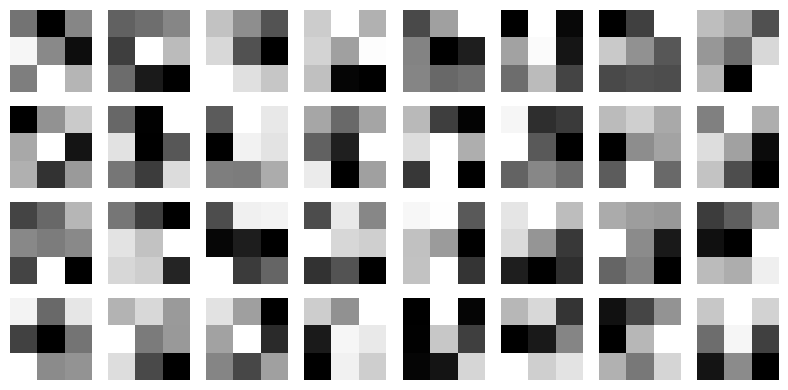

In [23]:
def visualize_kernels(layer):
    kernels = layer.weight.data.cpu().numpy()
    kernels = (kernels - kernels.min()) / (kernels.max() - kernels.min())  # Normalize

    num_kernels = kernels.shape[0]
    num_cols = 8  # Or any number you prefer
    num_rows = num_kernels // num_cols + (num_kernels % num_cols != 0)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))
    for i, ax in enumerate(axs.flat):
        if i < num_kernels:
            kernel = kernels[i, 0]  # Assuming grayscale (1 channel)
            ax.imshow(kernel, cmap="gray")
            ax.axis('off')
        else:
            ax.remove()  # Remove unused subplots
    plt.tight_layout()
    plt.show()

visualize_kernels(model.conv1)

We can clearly see from the kernels that, as we move deeper into the network, the kernels become more complex and start to capture more abstract features. The first layer kernels capture simple patterns like edges and gradients, while the deeper layers capture more complex patterns and textures. This progression is expected as the network learns to extract higher-level features from the input images.

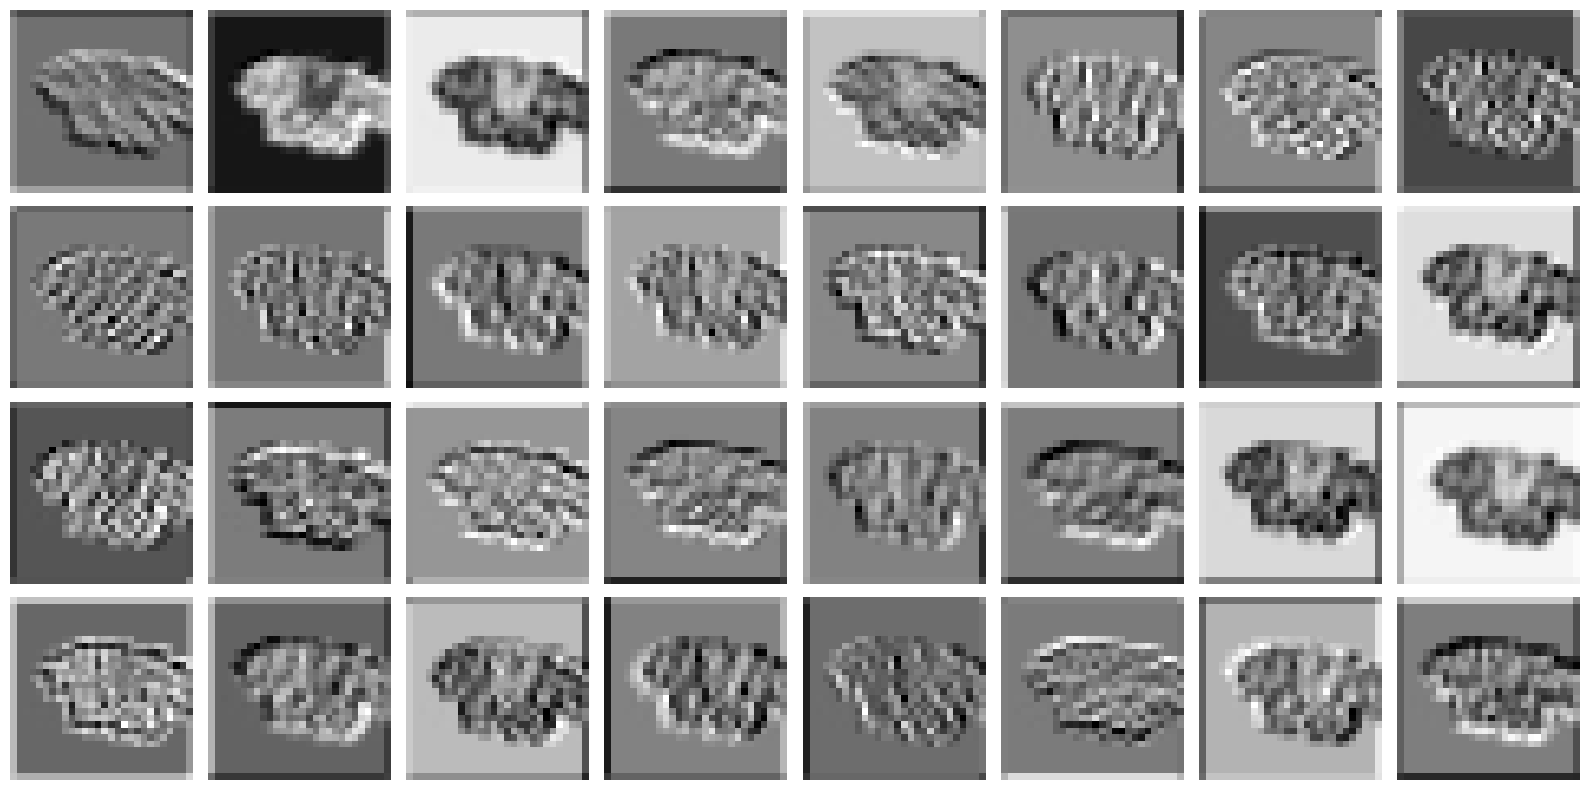

In [24]:
def visualize_feature_maps(model, layer_name, image):
    activation = {}
    def hook_fn(m, i, o): activation[layer_name] = o
    hook = getattr(model, layer_name).register_forward_hook(hook_fn)
    
    # Forward pass through the model
    _ = model(image)
    
    # Detach the hook
    hook.remove()

    feature_maps = activation[layer_name].squeeze(0)
    num_feature_maps = feature_maps.size(0)
    num_cols = 8  # Adjust as needed
    num_rows = num_feature_maps // num_cols + (num_feature_maps % num_cols != 0)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))
    for i, ax in enumerate(axs.flat):
        if i < num_feature_maps:
            ax.imshow(feature_maps[i].cpu().detach().numpy(), cmap="gray")
            ax.axis('off')
        else:
            ax.remove()  # Remove unused subplots
    plt.tight_layout()
    plt.show()

visualize_feature_maps(model, 'conv1', image)

We can observe that each feature map captures different aspects of the input image, highlighting different patterns and textures. This diversity in feature maps allows the network to learn a rich representation of the input images, enabling it to make accurate predictions. The visualization of feature maps provides insights into how the network processes the input images and extracts relevant information for classification.

### **PART B: Transfer Learning**







#### 1. Load a Pretrained model (the simpler the better for computational efficiency e.g.resnet16). You are gonna use it to train your model on Fashion Mnist

In [42]:
from torchvision import datasets, transforms
import torch.utils.data

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),  # ResNet's expected input size
    transforms.Grayscale(num_output_channels=3),  # Convert to 3-channel RGB
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize
])


train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
val_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

#### 2. Freeze the BackBone of the pretrained model (Convolutions etc) and modify the final fully connected layer/layers that perform classification (make sure the new output dimension matches the number of classes in Fashion Mnist)

In [43]:
model = models.resnet18(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

num_classes = 10
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### 3. Train the model on Fashion Mnist for a few epoches and log your train/val loss progress as well as the final model accuracy on the validation set.

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

In [46]:
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   100] loss: 1.306
[1,   200] loss: 0.737
[1,   300] loss: 0.611
[1,   400] loss: 0.571
[1,   500] loss: 0.559
[1,   600] loss: 0.530
[1,   700] loss: 0.515
[1,   800] loss: 0.480
[1,   900] loss: 0.497
[2,   100] loss: 0.471
[2,   200] loss: 0.466
[2,   300] loss: 0.454
[2,   400] loss: 0.466
[2,   500] loss: 0.458
[2,   600] loss: 0.462
[2,   700] loss: 0.449
[2,   800] loss: 0.441
[2,   900] loss: 0.446
[3,   100] loss: 0.432
[3,   200] loss: 0.432
[3,   300] loss: 0.448
[3,   400] loss: 0.414
[3,   500] loss: 0.447
[3,   600] loss: 0.416
[3,   700] loss: 0.420
[3,   800] loss: 0.436
[3,   900] loss: 0.432
[4,   100] loss: 0.414
[4,   200] loss: 0.412
[4,   300] loss: 0.414
[4,   400] loss: 0.410
[4,   500] loss: 0.406
[4,   600] loss: 0.421
[4,   700] loss: 0.408
[4,   800] loss: 0.407
[4,   900] loss: 0.430
[5,   100] loss: 0.407
[5,   200] loss: 0.393
[5,   300] loss: 0.390
[5,   400] loss: 0.399
[5,   500] loss: 0.410
[5,   600] loss: 0.396
[5,   700] loss: 0.424
[5,   800] 

In [50]:
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for data in val_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy of the model on the test images: {accuracy * 100:.2f}%')


Accuracy of the model on the test images: 85.62%


Achieving an accuracy of 85.62% on the test images with the adapted ResNet-18 model for the FashionMNIST dataset is a commendable result, especially considering the complexity and variability inherent in fashion item images. This outcome underscores the effectiveness of utilizing transfer learning techniques, where a model pre-trained on a large and diverse dataset is fine-tuned for a specific task. By retraining only the final layer of the ResNet-18 model to classify 10 different types of fashion items, while keeping the rest of the model's weights fixed, significant computational resources and time were saved. This approach not only leverages the pre-trained model's ability to extract general features from images but also tailors it to the specifics of the FashionMNIST dataset, resulting in high accuracy with relatively minimal effort. This success highlights the practicality and efficiency of transfer learning in real-world applications, particularly in domains where collecting a vast amount of labeled data is challenging.

#### **Optional:** If you are interested you can also unfreeze the final convolutions of the pretrained model to Fine Tune it. You can even visualize the Feature Maps of you model.

#### *Guidelines*: The goal of this assignment is that you play around a little bit with terms and notions introduced. You don' t have to train your models for ages. 5-10 epoches will suffice. We just want to see that you can make a model properly, train it and log some results.